<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [105]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [106]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [107]:
df = pd.read_csv('loan_train.csv')
print(df.columns)
df.head()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [108]:
df.shape

(346, 10)

### Convert to date time object


In [109]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [110]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [111]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

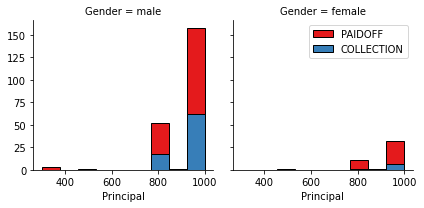

In [112]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

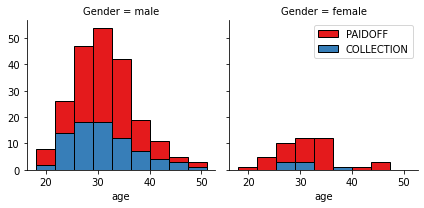

In [113]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


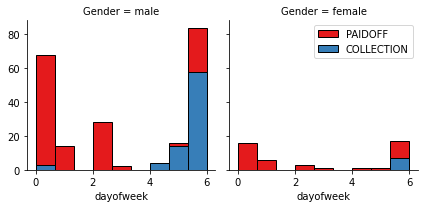

In [114]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [115]:
# Adds column weekend, which is positive if day of the week is greater than 3, i.e friday, saturday, sunday
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [116]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [117]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [118]:
df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

#### Features before One Hot Encoding


In [119]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [155]:
Feature = df[['Principal','terms','age','Gender','weekend']] #defines new dataframe without loan status
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True) # because there are only 2 individuals in Master category
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [121]:
df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

### Feature Selection


Let's define feature sets, X:


In [156]:
X = Feature.values  # X is equal to features
X[0:5]

array([[1000,   30,   45,    0,    0,    0,    1,    0],
       [1000,   30,   33,    1,    0,    1,    0,    0],
       [1000,   15,   27,    0,    0,    0,    0,    1],
       [1000,   30,   28,    1,    1,    0,    0,    1],
       [1000,   30,   29,    0,    1,    0,    0,    1]], dtype=int64)

What are our lables?


In [157]:
y = df['loan_status'].values  #values to predict
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [158]:
X= preprocessing.StandardScaler().fit(X).transform(X) #standarize feature data fo apply the model
X[0:5] 

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [159]:
# splitin loan_train to find best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67, 0.66, 0.71, 0.69, 0.76, 0.71, 0.79, 0.76, 0.76, 0.67, 0.7 ,
       0.73, 0.7 , 0.7 , 0.69, 0.73, 0.73, 0.73, 0.7 , 0.69])

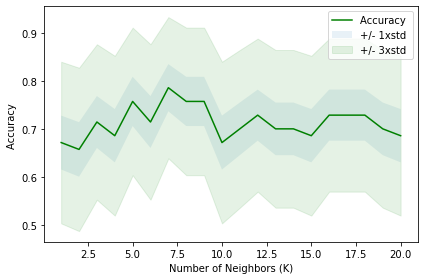

The best accuracy was with 0.7857142857142857 with k= 7


In [161]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [162]:
k = 7
#Train Model and Predict  
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat7 = neigh7.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh7.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat7))

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


# Decision Tree


In [129]:
# Set features and target
Xtree = df[['Principal','terms','education','Gender','weekend','age']].values #defines new dataframe without loan status
y = df['loan_status'].values

# make variables hot encoder
from sklearn import preprocessing
le_principal = preprocessing.LabelEncoder()
le_principal.fit([1000,900,800,500,300])   # Transform sex value to dummies variables
Xtree[:,0] = le_principal.transform(Xtree[:,0]) 

le_terms = preprocessing.LabelEncoder()
le_terms.fit([7,15,30])  # Transform blood pressure value to dummies variables
Xtree[:,1] = le_terms.transform(Xtree[:,1])

le_edu = preprocessing.LabelEncoder()
le_edu.fit([ 'Bechalor', 'High School or Below', 'Master or Above', 'college']) # Transform cholesterol value to dummies variables
Xtree[:,2] = le_edu.transform(Xtree[:,2]) 

Xtree[0:15]

array([[4, 2, 1, 0, 0, 45],
       [4, 2, 0, 1, 0, 33],
       [4, 1, 3, 0, 0, 27],
       [4, 2, 3, 1, 1, 28],
       [4, 2, 3, 0, 1, 29],
       [4, 2, 3, 0, 1, 36],
       [4, 2, 3, 0, 1, 28],
       [2, 1, 3, 0, 1, 26],
       [0, 0, 3, 0, 1, 29],
       [4, 1, 1, 0, 1, 39],
       [4, 2, 3, 0, 1, 26],
       [3, 0, 3, 1, 1, 26],
       [4, 0, 1, 0, 1, 27],
       [2, 1, 3, 0, 1, 26],
       [4, 2, 1, 0, 1, 40]], dtype=object)

In [130]:
# Split data
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(Xtree, y, test_size=0.3, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (242, 6) (242,)
Test set: (104, 6) (104,)


In [131]:
# Set up decision tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
LoansTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoansTree.fit(X_trainset,y_trainset)
predLTree = LoansTree.predict(X_testset)

In [132]:
# Evaluate decision tree
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predLTree))

DecisionTrees's Accuracy:  0.6538461538461539


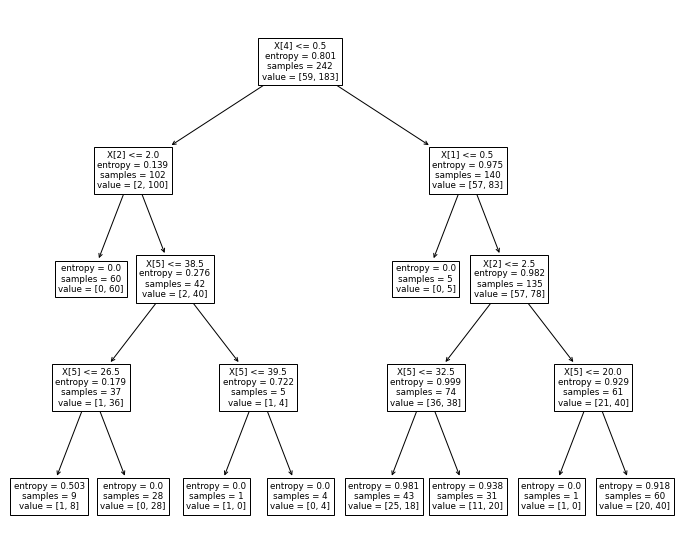

In [133]:
# Visualize decision tree
plt.figure(figsize=(12,10))
tree.plot_tree(LoansTree)
plt.show()
#print(X[4])

# Support Vector Machine


### The same 'X_tree' features array will be used for this model and also the split sets 'X_trainset, X_testset, y_trainset, y_testset'

### The four kernels of Support Vector Classification ('rbf','linear', 'poly' and 'sigmoid') are used and the one that fits better is chosen

In [134]:
# Set SVM model
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score, jaccard_score

clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 
#prediction
yhat = clf.predict(X_testset)
print("RBF Avg F1-score: %.7f" % f1_score(y_testset, yhat, average='weighted'))
print("RBF Jaccard score: %.7f" % jaccard_score(y_testset, yhat,average='binary', pos_label='PAIDOFF'))

# Set SVC with kernel=linear
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_trainset, y_trainset) 
yhat2 = clf2.predict(X_testset)
print("LINEAR Avg F1-score: %.7f" % f1_score(y_testset, yhat2, average='weighted'))
print("LINEAR Jaccard score: %.7f" % jaccard_score(y_testset, yhat2,pos_label='PAIDOFF'))

# Set SVC with kernel=Poly
clf3 = svm.SVC(kernel='poly', degree=6)
clf3.fit(X_trainset, y_trainset) 
yhat3 = clf3.predict(X_testset)
print("POLY Avg F1-score: %.7f" % f1_score(y_testset, yhat3, average='weighted'))
print("POLY Jaccard score: %.7f" % jaccard_score(y_testset, yhat3,pos_label='PAIDOFF'))

# Set SVC with kernel=SIGMOID
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(X_trainset, y_trainset) 
yhat4 = clf4.predict(X_testset)
print("SIGMOID Avg F1-score: %.7f" % f1_score(y_testset, yhat4, average='weighted'))
print("SIGMOID Jaccard score: %.7f" % jaccard_score(y_testset, yhat4,pos_label='PAIDOFF'))

RBF Avg F1-score: 0.6299405
RBF Jaccard score: 0.7403846
LINEAR Avg F1-score: 0.6299405
LINEAR Jaccard score: 0.7403846
POLY Avg F1-score: 0.6299405
POLY Jaccard score: 0.7403846
SIGMOID Avg F1-score: 0.6299405
SIGMOID Jaccard score: 0.7403846


#### Apparently, all the models have the same accuracy no matter what kernel is used, then the RBF kernel is the final model for SVM classifcation

In [135]:
# Define fuction to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        27
     PAIDOFF       0.74      1.00      0.85        77

    accuracy                           0.74       104
   macro avg       0.37      0.50      0.43       104
weighted avg       0.55      0.74      0.63       104

Confusion matrix, without normalization
[[77  0]
 [27  0]]


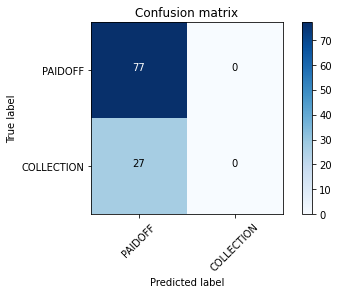

In [136]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

# Logistic Regression


### The same 'X_tree' features array will be used for this model 

In [137]:
# normalize dataset
from sklearn import preprocessing
XL = preprocessing.StandardScaler().fit(Xtree).transform(Xtree)
XL

array([[ 0.57,  0.88, -0.65, -0.42, -1.21,  2.33],
       [ 0.57,  0.88, -1.52,  2.38, -1.21,  0.34],
       [ 0.57, -0.85,  1.1 , -0.42, -1.21, -0.65],
       ...,
       [-1.59, -0.85,  1.1 , -0.42, -1.21,  1.34],
       [ 0.57,  0.88,  1.1 , -0.42, -1.21, -0.49],
       [ 0.57,  0.88,  1.1 , -0.42, -1.21, -0.82]])

In [138]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( XL, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [139]:
# set up Logistic regression clasifcation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

# predict classification
yhat = LR.predict(X_test)
yhat

# predict probability of classes
yhat_prob = LR.predict_proba(X_test)
yhat_prob;

In [140]:
# Evaluation of Logistic regression clasificatino
from sklearn.metrics import jaccard_score, log_loss

print('Jaccard score: %.7f' % jaccard_score(y_test, yhat,pos_label='PAIDOFF') )
print('Log loss score: %.7f' % log_loss(y_test, yhat_prob) )

Jaccard score: 0.6764706
Log loss score: 0.5762486


Confusion matrix, without normalization
[[46  9]
 [13  2]]


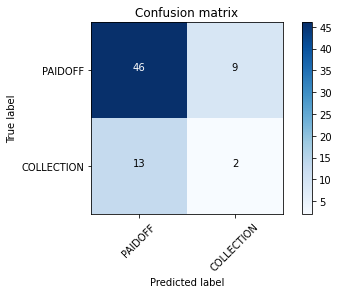

In [141]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

# Model Evaluation using Test set


In [183]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
from markdown import markdown


First, download and load the test set:


In [143]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load Test set for evaluation


In [163]:
test_df = pd.read_csv('loan_test.csv')
y_test = test_df['loan_status'].values
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# to datetime
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# classify by day of week 
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


### Evaluation of K-Nearest neighbours classifcation using K=7 because with this value of K the maximum mean accuracty was obtained 

In [171]:
Feature = test_df[['Principal','terms','age','Gender','weekend']] #defines new dataframe without loan status
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True) # because there are only 2 individuals in Master category

Xk =Feature.values
Xk= preprocessing.StandardScaler().fit(Xk).transform(Xk) #standarize feature data fo apply the model

yhat_k = neigh7.predict(Xk)
print("KNN Accuracy (k=7):", metrics.accuracy_score(y_test, yhat_k))

print(classification_report(y_test, yhat_k))
knnf1 = f1_score(y_test, yhat_k, average='weighted')
knnjac = jaccard_score(y_test, yhat_k,pos_label='PAIDOFF')
print('F1=',knnf1, '\t jaccard= ', knnjac)

Test set Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

  COLLECTION       0.25      0.14      0.18        14
     PAIDOFF       0.74      0.85      0.79        40

    accuracy                           0.67        54
   macro avg       0.49      0.50      0.49        54
weighted avg       0.61      0.67      0.63        54

F1= 0.6328400281888654 	 jaccard=  0.6538461538461539


### Evaluation of  Decision tree

In [173]:
test_df.groupby(['Principal'])['loan_status'].value_counts()

Principal  loan_status
300        PAIDOFF         3
700        PAIDOFF         1
800        PAIDOFF         6
           COLLECTION      5
1000       PAIDOFF        30
           COLLECTION      9
Name: loan_status, dtype: int64

In [174]:
Xtree = test_df[['Principal','terms','education','Gender','weekend','age']].values #defines new dataframe without loan status

# make variables hot encoder
from sklearn import preprocessing
le_principal = preprocessing.LabelEncoder()
le_principal.fit([1000,800,700,300])   # Transform sex value to dummies variables
Xtree[:,0] = le_principal.transform(Xtree[:,0]) 

le_terms = preprocessing.LabelEncoder()
le_terms.fit([7,15,30])  # Transform blood pressure value to dummies variables
Xtree[:,1] = le_terms.transform(Xtree[:,1])

le_edu = preprocessing.LabelEncoder()
le_edu.fit([ 'Bechalor', 'High School or Below', 'Master or Above', 'college']) # Transform cholesterol value to dummies variables
Xtree[:,2] = le_edu.transform(Xtree[:,2]) 

Xtree[0:15]

array([[3, 2, 0, 1, 0, 50],
       [0, 0, 2, 0, 1, 35],
       [3, 2, 1, 1, 1, 43],
       [3, 2, 3, 0, 1, 26],
       [2, 1, 0, 0, 1, 29],
       [1, 1, 1, 0, 1, 33],
       [3, 1, 3, 0, 1, 24],
       [3, 2, 0, 0, 1, 32],
       [2, 1, 3, 1, 1, 27],
       [3, 1, 3, 0, 1, 37],
       [2, 1, 1, 0, 1, 24],
       [0, 0, 3, 0, 1, 35],
       [3, 2, 0, 0, 1, 31],
       [3, 2, 3, 1, 1, 37],
       [3, 2, 1, 1, 1, 37]], dtype=object)

In [176]:
y_tree = LoansTree.predict(Xtree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_tree))
print(classification_report(y_test, y_tree))
treef1 = f1_score(y_test, y_tree, average='weighted')
treejac = jaccard_score(y_test, y_tree,pos_label='PAIDOFF')
print('F1=',treef1, '\t jaccard= ', treejac)

DecisionTrees's Accuracy:  0.7592592592592593
              precision    recall  f1-score   support

  COLLECTION       0.55      0.43      0.48        14
     PAIDOFF       0.81      0.88      0.84        40

    accuracy                           0.76        54
   macro avg       0.68      0.65      0.66        54
weighted avg       0.74      0.76      0.75        54

F1= 0.7491655510932619 	 jaccard=  0.7291666666666666


### Evaluation of SVM classifcation

In [180]:
# X dataset input is the same that for the decision tree model
y_svm = clf.predict(Xtree)
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, y_svm))
print(classification_report(y_test, y_svm))
svmf1 = f1_score(y_test, y_svm, average='weighted')
svmjac = jaccard_score(y_test, y_svm,pos_label='PAIDOFF')
print('F1=',svmf1, '\t jaccard= ', svmjac)
#print("RBF Avg F1-score: %.7f" % f1_score(y_test, y_svm, average='weighted'))
#print("RBF Jaccard score: %.7f" % jaccard_score(y_test, y_svm ,average='binary', pos_label='PAIDOFF'))

SVM's Accuracy:  0.7407407407407407
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54

F1= 0.6304176516942475 	 jaccard=  0.7407407407407407


C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jesus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluation of Logistic Regression classifcation

In [181]:
# Normalize Xtree data
XLR = preprocessing.StandardScaler().fit(Xtree).transform(Xtree)
y_LR = LR.predict(XLR)
yLR_prob = LR.predict_proba(XLR)

print("Logistic Regresion Accuracy: ", metrics.accuracy_score(y_test, y_LR))
print(classification_report(y_test, y_LR))
lrf1 = f1_score(y_test, y_LR, average='weighted')
lrjac = jaccard_score(y_test, y_LR ,pos_label='PAIDOFF')
lr_logloss = log_loss(y_test, yLR_prob)
print('F1=', lrf1, '\t jaccard= ', lrjac, '\t Log loss= ', lr_logloss)

Logistic Regresion Accuracy:  0.7407407407407407
              precision    recall  f1-score   support

  COLLECTION       0.50      0.07      0.12        14
     PAIDOFF       0.75      0.97      0.85        40

    accuracy                           0.74        54
   macro avg       0.62      0.52      0.49        54
weighted avg       0.69      0.74      0.66        54

F1= 0.6604267310789049 	 jaccard=  0.7358490566037735 	 Log loss=  0.5691394207315784


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


In [187]:
reportdata = np.array([['KNN', knnjac, knnf1,'NA'], ['Decision tree', treejac, treef1,'NA'],
                       ['SVM', svmjac, svmf1,'NA'], ['LogisticRegression', lrjac, lrf1,lr_logloss]])
report = pd.DataFrame(reportdata, columns=['Algorithm','Jaccard','f1-score','LogLoss'])
report

,Algorithm,Jaccard,f1-score,LogLoss
0,KNN,0.6538461538461539,0.6328400281888654,NA
1,Decision tree,0.7291666666666666,0.7491655510932619,NA
2,SVM,0.7407407407407407,0.6304176516942475,NA
3,LogisticRegression,0.7358490566037735,0.6604267310789049,0.5691394207315784


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | {{ knnjac }}       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
